# Introducción al Análisis Exploratorio de Datos con Pandas

Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades (outliers) de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Es un proceso iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre uno o varios Dataframes.

## Temario

Estos son algunos de los temas que intentaremos revisar a lo largo del analisis propuesto

- Analizando propiedades especificas del set de datos.
- Verificacion de la calidad de datos.
   - Validacion de datos
- Manipulando el Data Frame
   - Manejo de Indices
   - Agrupamiento (Group By) para agregacion, filtrado y transformacion.
   - Reestructurando Datos
- Visualizaciones
    - Examinando la distribucion de una variables
        - Histograma
        - Density Plot
    - Explorando relacion entre variables
        - Overlaid Histogram
        - Scatter Plot
        - Heatmap
    - Comparando Grupos o categorias
        - Bar Plot
        - Grouped Bar Plot
        - Box Plot
    - Recomendaciones generales para visualizacion

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## Analisis Exploratorio de Datos: Kickstarter Projects

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un data frame vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/kemical/kickstarter-projects/data](https://www.kaggle.com/kemical/kickstarter-projects/data)

Este set de datos posee informacion de unos 300000 proyectos de Kickstarter, la popular plataforma de Crowdsourcing. Nuestro objetivo será realizar un análisis exploratorio sobre esa información, para intentar obtener algunos insights de de la misma.

En particular el dataset tiene dos archivos, uno con informacion parcial recopilada anteriormente y uno con informacion hasta inicios del 2018 (con el que estaremos trabajando).

**Nota:** para aquellos que quieran realizar analisis de los datos anteriores tener en cuenta que el formato de encoding se encuentra en 'Western(windows 1252)' por lo que al realizar la carga con read_csv hay que indicar el encoding como ```encoding='cp1252'```

### Carga de Informacion en un Dataframe

Pandas soporta distintas fuentes de informacion en distintos formatos (desde archivos de csv, excel, hasta fuentes remotas como urls o bases de datos, etc.). En este caso vamos a cargar la informacion desde un CSV que hemos descargado previamente de kaggle. Esto lo podemos hacer con pandas con ```read_csv```. 

Inicialmente podremos ver parte del data frame para tener idea de la estructura del mismo.

In [163]:
# %timeit sirve para evaluar el tiempo de ejecucion
projects_2017 = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv')
#projects_2017.head()
#projects_2017

1.42 s ± 31.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [164]:
# analizemos primero las dimensiones del data frame
print(projects_2017.shape)

(378661, 15)


In [165]:
# veamos la informacion general del dataframe con info()
print(projects_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [166]:
# si especificamente queremos saber los datatypes que estamos utilizando.
# y por ejemplo decidir setear algunos especificamente en carga
projects_2017.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

### Analizando propiedades especificas del set de datos

Para poder comenzar a orientar nuestro analisis podemos por ejemplo querer comenzar a analizar algunas variables que nos interesan para aplicar en nuestros analisis.
Podemos por ejemplo comenzar las **categorias disponibles principales**

In [167]:
main_categories = projects_2017['main_category']

In [168]:
type(main_categories)

pandas.core.series.Series

In [169]:
# de esta forma obtenemos la cantidad de valores que hay para cada una de las main_categories 
# contando los proyectos por categoria principal
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

Tambien podemos interesarnos en ver los posibles valores que podemos tener de **estados de un proyectos**

In [170]:
states = projects_2017['state']
states.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

En ambos casos, podemos considerar a las variables como categoricas que podremos usar para nuestro analisis, las cuales podremos utilizar para agrupar o dividir informacion, o filtrar informacion a considerar en el mismo.


por otro lado podemos analizar la columna **launched** para entender su uso en el data set.

In [171]:
projects_2017['launched'].head()

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object

In [172]:
# generamos nuevas columnas seteando el tipo datetime
projects_2017['launched_datetime'] = pd.to_datetime(projects_2017['launched'])
# generamos una nueva columna obteniendo el año, esto los usuaremos en visualizacion.
projects_2017['year'] = projects_2017['launched_datetime'].dt.year


In [173]:
projects_2017['year'].value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

In [174]:
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
ID                   378661 non-null int64
name                 378657 non-null object
category             378661 non-null object
main_category        378661 non-null object
currency             378661 non-null object
deadline             378661 non-null object
goal                 378661 non-null float64
launched             378661 non-null object
pledged              378661 non-null float64
state                378661 non-null object
backers              378661 non-null int64
country              378661 non-null object
usd pledged          374864 non-null float64
usd_pledged_real     378661 non-null float64
usd_goal_real        378661 non-null float64
launched_datetime    378661 non-null datetime64[ns]
year                 378661 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 49.1+ MB


La cual podemos ver que no indicar la fecha de lanzamiento del proyecto y que podremos utilizar para desarrollar analisis de series de tiempo.

Haciendo un analisis de algunas de las otras variables podemos tambien llegar a la conclusion de lo que representan las siguientes variables:

- **Goal**: Objetivo a obtener de recaudacion para un proyecto
- **Pledged**: Cantidad recaudada para un proyecto
- **Backers**: Cantidad de personas que invirtieron en el proyecto.

### Verificacion de Calidad de Datos

Algunas verificaciones que son utiles para ver la consistencia de los datos, en particular si vienen de una fuente de ese tipo.

Podemos verificar las dimensiones del data frame (via ```.shape```), si existen valores nulos (via ```.insnull```) en el mismo y metricas generales de las columnas o features del data frame que podemos analizar via ```.describe```

In [175]:
# por ejemplo de la siguiente forma podemos ver los nulos si existen
projects_2017.isnull().any()

ID                   False
name                  True
category             False
main_category        False
currency             False
deadline             False
goal                 False
launched             False
pledged              False
state                False
backers              False
country              False
usd pledged           True
usd_pledged_real     False
usd_goal_real        False
launched_datetime    False
year                 False
dtype: bool

In [176]:
projects_2017.isnull().sum()

ID                      0
name                    4
category                0
main_category           0
currency                0
deadline                0
goal                    0
launched                0
pledged                 0
state                   0
backers                 0
country                 0
usd pledged          3797
usd_pledged_real        0
usd_goal_real           0
launched_datetime       0
year                    0
dtype: int64

La informacion que podemos considerar en relacion a los nulos nos permite guiarnos sobre la calidad del set de datos que tenemos y casos en los que podemos ver por ejemplo que datos utilizar o no sobre nuestros analisis o si eventualmente tenemos que realizar algun otro tipo de informacion

In [177]:
# metricas generales de las columnas o features numericos del data frame que podemos analizar via .describe
projects_2017.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,year
count,"378,661.00","378,661.00","378,661.00","378,661.00","374,864.00","378,661.00","378,661.00","378,661.00"
mean,"1,074,731,191.99","49,080.79","9,682.98",105.62,"7,036.73","9,058.92","45,454.40","2,014.25"
std,"619,086,204.32","1,183,391.26","95,636.01",907.19,"78,639.75","90,973.34","1,152,950.06",1.93
min,"5,971.00",0.01,0.00,0.00,0.00,0.00,0.01,"1,970.00"
25%,"538,263,516.00","2,000.00",30.00,2.00,16.98,31.00,"2,000.00","2,013.00"
50%,"1,075,275,634.00","5,200.00",620.00,12.00,394.72,624.33,"5,500.00","2,014.00"
75%,"1,610,148,624.00","16,000.00","4,076.00",56.00,"3,034.09","4,050.00","15,500.00","2,016.00"
max,"2,147,476,221.00","100,000,000.00","20,338,986.27","219,382.00","20,338,986.27","20,338,986.27","166,361,390.71","2,018.00"


Para nuestros analisis y considerando los valores de media y desviacion podemos ver que hay una gran dispersion tanto en las columnas de goal, pledged y backers. Esto puede darnos algunos problemas para intentar visualizar esas variables.

In [178]:
# para visualizar toda la informacion
projects_2017.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_datetime,year
count,"378,661.00",378657,378661,378661,378661,378661,"378,661.00",378661,"378,661.00",378661,"378,661.00",378661,"374,864.00","378,661.00","378,661.00",378661,"378,661.00"
unique,nan,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan,378089,nan
top,nan,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan,1970-01-01 01:00:00,nan
freq,nan,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan,7,nan
first,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,1970-01-01 01:00:00,nan
last,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,2018-01-02 15:02:31,nan
mean,"1,074,731,191.99",NaN,NaN,NaN,NaN,NaN,"49,080.79",NaN,"9,682.98",NaN,105.62,NaN,"7,036.73","9,058.92","45,454.40",NaN,"2,014.25"
std,"619,086,204.32",NaN,NaN,NaN,NaN,NaN,"1,183,391.26",NaN,"95,636.01",NaN,907.19,NaN,"78,639.75","90,973.34","1,152,950.06",NaN,1.93
min,"5,971.00",NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01,NaN,"1,970.00"
25%,"538,263,516.00",NaN,NaN,NaN,NaN,NaN,"2,000.00",NaN,30.00,NaN,2.00,NaN,16.98,31.00,"2,000.00",NaN,"2,013.00"


In [180]:
#projects_2017['country'].value_counts()
projects_2017 = projects_2017[projects_2017['country'] == 'US']

In [181]:
projects_2017['currency'].value_counts()

USD    292627
Name: currency, dtype: int64

## Manipulando el Data Frame

En la siguiente seccion, trabajaremos con este data frame para poder incorporar algunos conceptos y herramientas que pueden sernos de utilidad en nuestro analisis exploratorio.

### Manejo de Indices

- Proveen un label para cada una de las columnas en el DataFrame
- Si un indice no se encuentra indicado explicitamente, un RangeIndex es creado por default con label comenzando en 0.

Dado nuestro DataFrame, podemos evaluar el indice actualmente que tiene de la siguiente forma

In [182]:
projects_2017.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     11,
            ...
            378648, 378649, 378650, 378653, 378654, 378656, 378657, 378658,
            378659, 378660],
           dtype='int64', length=292627)

In [183]:
type(projects_2017.index) # en este caso a tomado inicialmente el indice del campo ID del csv.

pandas.core.indexes.numeric.Int64Index

In [184]:
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292627 entries, 1 to 378660
Data columns (total 17 columns):
ID                   292627 non-null int64
name                 292624 non-null object
category             292627 non-null object
main_category        292627 non-null object
currency             292627 non-null object
deadline             292627 non-null object
goal                 292627 non-null float64
launched             292627 non-null object
pledged              292627 non-null float64
state                292627 non-null object
backers              292627 non-null int64
country              292627 non-null object
usd pledged          292627 non-null float64
usd_pledged_real     292627 non-null float64
usd_goal_real        292627 non-null float64
launched_datetime    292627 non-null datetime64[ns]
year                 292627 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 40.2+ MB


#### Eliminando el indice

Para poder eliminar un indice especifico que tiene el DataFrame podemos utilizar el metodo ```reset_index```

In [190]:
# en este caso si elimino el indice
projects_2017.reset_index(inplace=True) #notar que si queremos hacerlo sobre el mismo DataFrame tenemos que usar

In [191]:
# obtengo el indice por default de un DataFrame en pandas, RangeIndex
projects_2017.index

RangeIndex(start=0, stop=292627, step=1)

In [192]:
projects_2017

,index,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_datetime,year
0,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00",2017-09-02 04:43:57,2017
1,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00",2013-01-12 00:20:50,2013
2,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00",2012-03-17 03:24:11,2012
3,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00",2015-07-04 08:35:03,2015
4,5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,"50,000.00",2016-02-26 13:38:27,"52,375.00",successful,224,US,"52,375.00","52,375.00","50,000.00",2016-02-26 13:38:27,2016
5,6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,"1,000.00",2014-12-01 18:30:44,"1,205.00",successful,16,US,"1,205.00","1,205.00","1,000.00",2014-12-01 18:30:44,2014
6,7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,"25,000.00",2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,"25,000.00",2016-02-01 20:05:12,2016
7,8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,"125,000.00",2014-04-24 18:14:43,"8,233.00",canceled,58,US,"8,233.00","8,233.00","125,000.00",2014-04-24 18:14:43,2014
8,9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,"65,000.00",2014-07-11 21:55:48,"6,240.57",canceled,43,US,"6,240.57","6,240.57","65,000.00",2014-07-11 21:55:48,2014
9,11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,"12,500.00",2013-03-09 06:42:58,"12,700.00",successful,100,US,"12,700.00","12,700.00","12,500.00",2013-03-09 06:42:58,2013


#### Creando un Indice

Lo realizamos mediante el metodo ```set_index```

In [193]:
projects_2017.set_index('ID', inplace=True) 
# tambien se puede indicar al cargar el data frame usando el parametro index_col
# si no se quiere que se elimine la columna ID, usar parametro drop=False

In [194]:
# volvemos al indice que obtuvimos en carga
projects_2017.index

Int64Index([1000003930, 1000004038, 1000007540, 1000011046, 1000014025,
            1000023410, 1000030581, 1000034518,  100004195,  100005484,
            ...
             999955533,  999963618,   99996661,  999972264,  999975836,
             999976400,  999977640,  999986353,  999987933,  999988282],
           dtype='int64', name='ID', length=292627)

### Agrupamiento (Group By) para agregacion, filtrado y transformacion

Al referirnos usualmente a ```groupby```, usualmente hacemos referencia al proceso conocido como split-apply-combine que considera:

- Split: Separar los datos en grupos basados en algun tipo de criterio.
- Apply: Aplicar una funcion a cada uno de los grupos de forma independiente.
- Combine: Combinar los resultados en una estructura de datos resultante.

El uso mas comun de groupby is para realizar una agregacion (la cual toma varios valores y los convierte en un unico valor)

Para poder realizar esto, vamos a definir una columna para realizar la agregarion (de donde vamos a obtener los valores agregar) y una funcion de agregracion (como vamos a realizar la agregacion).

Las mas comunes usualmente son mean, sum, max, min, count, etc...

La forma mas sencilla de realizarlo es utilizando un groupby y un apply:

En este caso podriamos estar interesados en realizar algunas agregaciones para entender algunos valores por **categoria de proyecto y estado del mismo**.

In [195]:
# agrupando usando multiples columnas
grouped = projects_2017.groupby(['main_category','state']).agg({'backers':['mean','sum'],'pledged':'mean', 'goal':'mean'}) 

In [198]:
grouped.index

MultiIndex(levels=[['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater'], ['canceled', 'failed', 'live', 'successful', 'suspended']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['main_category', 'state'])

In [199]:
per_year = projects_2017.groupby('year').agg({'backers':['mean','sum'],'pledged':['mean','sum'], 'goal': ['mean','sum']})

In [201]:
per_year.index

Int64Index([1970, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='year')

### Agrupando por una columna

Siguiendo un poco los casos anteriores podemos indicar el campo y la funcion de agregacion para hacerlo por una unica columna

In [205]:
per_year = projects_2017.groupby('year').agg({'backers':'sum'}) # notar que se obtiene un DataFrame
per_year

,backers
year,
1970,0
2009,43758
2010,406875
2011,1396473
2012,4224656
2013,5705141
2014,5182188
2015,5989765
2016,5388809


In [206]:
per_year.sort_values(ascending=False,by="backers")

,backers
year,
2015,5989765
2013,5705141
2016,5388809
2014,5182188
2017,4751487
2012,4224656
2011,1396473
2010,406875
2009,43758


Otra variante es indicar la columna en la el metodo agg podemos seleccionarla usando el operador de indexacion

In [211]:
per_year = projects_2017.groupby('year')['backers'].agg('sum') # notar que se obteniene una Serie

In [221]:
per_year.sort_values(ascending=False)

year
2015    5989765
2013    5705141
2016    5388809
2014    5182188
2017    4751487
2012    4224656
2011    1396473
2010     406875
2009      43758
2018        704
1970          0
Name: backers, dtype: int64

In [222]:
# cuidado entre las funciones de sum de pandas y numpy. (manejo de nulos)
per_year = projects_2017.groupby('year')['backers'].agg(np.sum)

In [223]:
per_year.sort_values(ascending=False)

year
2015    5989765
2013    5705141
2016    5388809
2014    5182188
2017    4751487
2012    4224656
2011    1396473
2010     406875
2009      43758
2018        704
1970          0
Name: backers, dtype: int64

In [224]:
per_year = projects_2017.groupby('year')['backers'].sum()

In [225]:
per_year.sort_values(ascending=False)

year
2015    5989765
2013    5705141
2016    5388809
2014    5182188
2017    4751487
2012    4224656
2011    1396473
2010     406875
2009      43758
2018        704
1970          0
Name: backers, dtype: int64

A su vez diferentes funciones pueden aplicarse en la misma operacion y a de distintos tipos a distintas columnas.

In [256]:
# notas que se indica una funcion built-in y una custom (la de numpy)
per_year = projects_2017.groupby('year').agg({'backers':'sum','pledged': ['mean', 'sum']})
per_year

backers              pledged                     
          sum                 mean                  sum
year                                                   
1970        0                 0.00                 0.00
2009    43758             2,141.08         2,845,501.11
2010   406875             2,800.48        29,458,272.97
2011  1396473             3,954.44       103,752,593.77
2012  4224656             7,760.48       314,664,113.74
2013  5705141            11,105.08       429,622,210.70
2014  5182188             8,533.22       433,223,285.43
2015  5989765            10,428.90       558,394,706.09
2016  5388809            13,245.41       503,722,817.56
2017  4751487            13,809.61       454,032,420.13
2018      704               532.44            43,660.00

In [257]:
per_year.reset_index(inplace=True)

In [258]:
per_year

year  backers              pledged                     
              sum                 mean                  sum
0   1970        0                 0.00                 0.00
1   2009    43758             2,141.08         2,845,501.11
2   2010   406875             2,800.48        29,458,272.97
3   2011  1396473             3,954.44       103,752,593.77
4   2012  4224656             7,760.48       314,664,113.74
5   2013  5705141            11,105.08       429,622,210.70
6   2014  5182188             8,533.22       433,223,285.43
7   2015  5989765            10,428.90       558,394,706.09
8   2016  5388809            13,245.41       503,722,817.56
9   2017  4751487            13,809.61       454,032,420.13
10  2018      704               532.44            43,660.00

In [259]:
per_year.columns = ['year', 'backers_sum', 'pledged_mean', 'pledge_sum']

In [260]:
per_year

,year,backers_sum,pledged_mean,pledge_sum
0,1970,0,0.00,0.00
1,2009,43758,"2,141.08","2,845,501.11"
2,2010,406875,"2,800.48","29,458,272.97"
3,2011,1396473,"3,954.44","103,752,593.77"
4,2012,4224656,"7,760.48","314,664,113.74"
5,2013,5705141,"11,105.08","429,622,210.70"
6,2014,5182188,"8,533.22","433,223,285.43"
7,2015,5989765,"10,428.90","558,394,706.09"
8,2016,5388809,"13,245.41","503,722,817.56"
9,2017,4751487,"13,809.61","454,032,420.13"


### Agrupando por multiples columnas

Group by puede recibir un conjunto de columnas, por ejemplo volviendo a nuestro **anterior analisis por categoria y estado del proyecto.**

In [261]:
grouped = projects_2017.groupby(['main_category','state'])

In [262]:
grouped.count().head(100)

index   name  category  currency  deadline   goal  \
main_category state                                                           
Art           canceled     1667   1667      1667      1667      1667   1667   
              failed      10953  10952     10953     10953     10953  10953   
              live          124    124       124       124       124    124   
              successful   9496   9496      9496      9496      9496   9496   
              suspended      71     71        71        71        71     71   
Comics        canceled      673    673       673       673       673    673   
              failed       3339   3339      3339      3339      3339   3339   
              live           59     59        59        59        59     59   
              successful   4820   4820      4820      4820      4820   4820   
              suspended      19     19        19        19        19     19   
Crafts        canceled      598    598       598       598       598    598   
              failed       4323   4323      4323      4323      4323   4323   
              live           46     46        46        46        46     46   
              successful   1640   1640      1640      1640      1640   1640   
              suspended      41     41        41        41        41     41   
Dance         canceled      126    126       126       126       126    126   
              failed        993    993       993       993       993    993   
              live           12     12        12        12        12     12   
              successful   2088   2088      2088      2088      2088   2088   
              suspended       9      9         9         9         9      9   
Design        canceled     2857   2857      2857      2857      2857   2857   
              failed      10804  10804     10804     10804     10804  10804   
              live          171    171       171       171       171    171   
              successful   7681   7681      7681      7681      7681   7681   
              suspended     177    176       177       177       177    177   
Fashion       canceled     1811   1811      1811      1811      1811   1811   
              failed      10416  10416     10416     10416     10416  10416   
              live          148    148       148       148       148    148   
              successful   4120   4120      4120      4120      4120   4120   
              suspended      89     89        89        89        89     89   
...                         ...    ...       ...       ...       ...    ...   
Journalism    canceled      374    374       374       374       374    374   
              failed       2311   2311      2311      2311      2311   2311   
              live           21     21        21        21        21     21   
              successful    798    798       798       798       798    798   
              suspended      36     36        36        36        36     36   
Music         canceled     2706   2706      2706      2706      2706   2706   
              failed      18507  18507     18507     18507     18507  18507   
              live          194    194       194       194       194    194   
              successful  21718  21718     21718     21718     21718  21718   
              suspended     113    113       113       113       113    113   
Photography   canceled      690    690       690       690       690    690   
              failed       4688   4688      4688      4688      4688   4688   
              live           30     30        30        30        30     30   
              successful   2541   2541      2541      2541      2541   2541   
              suspended      39     39        39        39        39     39   
Publishing    canceled     2805   2805      2805      2805      2805   2805   
              failed      18712  18712     18712     18712     18712  18712   
              live          198    198       198       198       198    198 

In [263]:
grouped.index

Inevitablemente al utilizar group by, vamos a estar creando un **MultiIndex** en las columnas, filas o ambas. Los DataFrames con MultiIndexes son mas dificiles de navegar y ocasionalmente tienen nombres de columnas mas confusos.

In [264]:
by_main_category_state = projects_2017.groupby(['main_category','state']).agg({'backers':['mean','sum'],'pledged':'mean', 'goal':'mean'}) 

Al hacer esto, obtenemos una estructura con dos niveles de indices. Esto dificulta el acceso a los datos.

Es por eso que intentaremos simplificar la estructura, para ello intentemos entender como esta la informacion en cada nivel de la misma

In [265]:
level0 = by_main_category_state.columns.get_level_values(0)

In [266]:
level0

Index(['backers', 'backers', 'pledged', 'goal'], dtype='object')

In [267]:
level1 = by_main_category_state.columns.get_level_values(1)

In [268]:
level1

Index(['mean', 'sum', 'mean', 'mean'], dtype='object')

Podemos ver que tenemos multiples columnas que se llaman mean, cada una correspondiente a backers, pledged y goal respectivamente.

vamos a intentar reducir esta estructura, concatenando ambos niveles en el mismo nombre de columna

In [269]:
by_main_category_state.columns = level0 + '_' + level1

In [270]:
by_main_category_state.columns

Index(['backers_mean', 'backers_sum', 'pledged_mean', 'goal_mean'], dtype='object')

Podemos ver que todavia tenemos dos niveles pero esto podemos reducirlo realizando un ```reset_index```

In [271]:
by_main_category_state.reset_index()

,main_category,state,backers_mean,backers_sum,pledged_mean,goal_mean
0,Art,canceled,8.08,13468,520.37,"42,709.40"
1,Art,failed,9.12,99860,641.06,"56,330.52"
2,Art,live,16.99,2107,"1,126.16","21,166.93"
3,Art,successful,88.85,843718,"6,919.10","4,522.81"
4,Art,suspended,12.21,867,584.49,"11,931.52"
5,Comics,canceled,19.37,13033,904.36,"12,757.82"
6,Comics,failed,21.33,71208,"1,036.00","48,072.56"
7,Comics,live,61.24,3613,"2,857.53","4,857.73"
8,Comics,successful,243.02,1171337,"12,193.53","5,639.63"
9,Comics,suspended,5.05,96,449.58,"23,336.63"


Si queremos realizar el cambio de forma permanente en el DataFrame debemos realizarlo inPlace

In [272]:
by_main_category_state.reset_index(inplace=True)

In [273]:
by_main_category_state

,main_category,state,backers_mean,backers_sum,pledged_mean,goal_mean
0,Art,canceled,8.08,13468,520.37,"42,709.40"
1,Art,failed,9.12,99860,641.06,"56,330.52"
2,Art,live,16.99,2107,"1,126.16","21,166.93"
3,Art,successful,88.85,843718,"6,919.10","4,522.81"
4,Art,suspended,12.21,867,584.49,"11,931.52"
5,Comics,canceled,19.37,13033,904.36,"12,757.82"
6,Comics,failed,21.33,71208,"1,036.00","48,072.56"
7,Comics,live,61.24,3613,"2,857.53","4,857.73"
8,Comics,successful,243.02,1171337,"12,193.53","5,639.63"
9,Comics,suspended,5.05,96,449.58,"23,336.63"


Por ultimo es importante notar que dependiendo del nivel de agrupamiento podriamos contar con multiples niveles

In [274]:
# por ejemplo agrupando por main_category, category (sub categoria) y state 
projects_2017.groupby(['main_category','category','state']).agg({'backers':['mean','sum'],'pledged':'mean', 'goal':'mean'}) 

backers          \
                                                        mean     sum   
main_category category       state                                     
Art           Art            canceled                   7.41    3794   
                             failed                     9.56   30241   
                             live                      10.82     476   
                             successful                89.93  247315   
                             suspended                 18.00     504   
              Ceramics       canceled                   2.75      55   
                             failed                     8.60    1006   
                             live                       5.00      10   
                             successful               111.13   12002   
              Conceptual Art canceled                   6.35     419   
                             failed                     7.81    3344   
                             live                      14.40      72   
                             successful                58.51   18371   
                             suspended                  5.75      23   
              Digital Art    canceled                   7.86     943   
                             failed                     6.28    3575   
                             live                      28.57     200   
                             successful                92.22   26652   
                             suspended                  1.00       1   
              Illustration   canceled                   9.76    1532   
                             failed                    10.98    9588   
                             live                      35.44     886   
                             successful               117.48  135333   
                             suspended                  0.20       1   
              Installations  canceled                  11.95     251   
                             failed                    13.63    1731   
                             live                       3.33      10   
                             successful                92.22   16876   
                             suspended                  2.33       7   
              Mixed Media    canceled                   5.86     949   
...                                                      ...     ...   
Theater       Experimental   live                      38.00     114   
                             successful                84.25   12638   
              Festivals      canceled                   9.45     208   
                             failed                     6.36     751   
                             live                       0.00       0   
                             successful                71.90   11144   
                             suspended                  0.00       0   
              Immersive      canceled                   5.59      95   
                             failed                    10.79     971   
                             live                      26.00      26   
                             successful                93.22   10814   
                             suspended                  1.50       3   
              Musical        canceled                   4.70     221   
                             failed                    11.36    2941   
                             live                      37.40     187   
                             successful                96.74   31635   
                             suspended                  5.00       5   
              Plays          canceled                   4.48     224   
                             failed                     7.31    2523   
                             live                      42.00     420   
                             successful                63.43   30131   
              Spaces         canceled                  33.71     472   
                     

### Reestructurando Datos

Para poder trabajar con nuestro set de datos es importante darle importancia a como se encuentran estructurados/presentados para poder facilitar nuestro analisis. Para ello tres principios basicos son de importancia:

- Cada variable conforma una columna
- Cada observacion representa una fila
- Cada tipo de conjunto/unidad de observaciones conforma una tabla

Para facilitar esto estaremos usando algunas funciones como:

- stack
- unstack
- pivot_table

Una buena fuente para profundizar es el siguiente articulo: https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

#### Stack y Unstack

Esta funcion fue nombrada por una analogia con una coleccion de libros que es reorganizada estando lado a lado en posicion horizontal (las columnas de un data frame) a estar apilados verticalmente uno encima del otro (en el indice del DataFrame).

Asumamos que tenemos un DataFrame con MultiIndices on las filas y columnas. Realizar un Stacking de un DataFrame significa mover el indice por columna mas interno del DataFrame para que se convierta en el indice por fila mas interno del DataFrame resultante (algo asi como rotar y pivotear).

La operacion inversa se llama unstacking. Esto significa mover el indice por fila mas interno del DataFrame para que se convierta en el indice por columna mas interno del DataFrame resultante.

En la siguiente representacion grafica se puede entender mas claramente:

![title](img/stack-unstack1.png)

Podemos entonces trabajar con los siguientes ejemplos

In [283]:
projects_by_main_category = projects_2017.groupby('main_category').agg({'backers':['mean','sum'],'pledged':'mean', 'goal':'mean', 'category': 'count'}) 

In [284]:
projects_by_main_category.head(10)

backers                       pledged  \
                              mean      sum                 mean   
main_category                                                      
Art                          43.03   960020             3,306.61   
Comics                      141.33  1259287             7,072.70   
Crafts                       29.87   198575             1,720.49   
Dance                        45.67   147427             3,695.30   
Design                      269.82  5852322            26,732.96   
Fashion                      67.79  1124305             6,079.90   
Film & Video                 70.86  3679279             6,659.95   
Food                         59.31  1182631             5,648.47   
Games                       375.69  9255400            24,947.34   
Journalism                   40.25   142481             2,815.56   

                              goal category  
                              mean    count  
main_category                                
Art                      32,925.69    22311  
Comics                   22,111.48     8910  
Crafts                   10,689.84     6648  
Dance                     9,345.09     3228  
Design                   44,079.06    21690  
Fashion                  22,524.95    16584  
Film & Video             80,393.30    51922  
Food                     36,526.48    19941  
Games                    49,400.62    24636  
Journalism              102,191.03     3540

In [288]:
#renombramos las columnas
projects_by_main_category.columns = ['backers_mean', 'backers_total', 'pledged_mean', 'goal_mean', 'projects_total']
# stackeamos los valores
stacked = projects_by_main_category.stack()
stacked

main_category                
Art            backers_mean                    43.03
               backers_total              960,020.00
               pledged_mean                 3,306.61
               goal_mean                   32,925.69
               projects_total              22,311.00
Comics         backers_mean                   141.33
               backers_total            1,259,287.00
               pledged_mean                 7,072.70
               goal_mean                   22,111.48
               projects_total               8,910.00
Crafts         backers_mean                    29.87
               backers_total              198,575.00
               pledged_mean                 1,720.49
               goal_mean                   10,689.84
               projects_total               6,648.00
Dance          backers_mean                    45.67
               backers_total              147,427.00
               pledged_mean                 3,695.30
               g

In [290]:
stacked.unstack()

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,43.03,"960,020.00","3,306.61","32,925.69","22,311.00"
Comics,141.33,"1,259,287.00","7,072.70","22,111.48","8,910.00"
Crafts,29.87,"198,575.00","1,720.49","10,689.84","6,648.00"
Dance,45.67,"147,427.00","3,695.30","9,345.09","3,228.00"
Design,269.82,"5,852,322.00","26,732.96","44,079.06","21,690.00"
Fashion,67.79,"1,124,305.00","6,079.90","22,524.95","16,584.00"
Film & Video,70.86,"3,679,279.00","6,659.95","80,393.30","51,922.00"
Food,59.31,"1,182,631.00","5,648.47","36,526.48","19,941.00"
Games,375.69,"9,255,400.00","24,947.34","49,400.62","24,636.00"


In [291]:
projects_by_main_category_reshaped = projects_by_main_category.stack().reset_index()

In [292]:
projects_by_main_category_reshaped.head(10)

,main_category,level_1,0
0,Art,backers_mean,43.03
1,Art,backers_total,"960,020.00"
2,Art,pledged_mean,"3,306.61"
3,Art,goal_mean,"32,925.69"
4,Art,projects_total,"22,311.00"
5,Comics,backers_mean,141.33
6,Comics,backers_total,"1,259,287.00"
7,Comics,pledged_mean,"7,072.70"
8,Comics,goal_mean,"22,111.48"
9,Comics,projects_total,"8,910.00"


In [293]:
projects_by_main_category_reshaped.columns = ['main_category','statistics','values']

In [294]:
projects_by_main_category_reshaped.head(10)

,main_category,statistics,values
0,Art,backers_mean,43.03
1,Art,backers_total,"960,020.00"
2,Art,pledged_mean,"3,306.61"
3,Art,goal_mean,"32,925.69"
4,Art,projects_total,"22,311.00"
5,Comics,backers_mean,141.33
6,Comics,backers_total,"1,259,287.00"
7,Comics,pledged_mean,"7,072.70"
8,Comics,goal_mean,"22,111.48"
9,Comics,projects_total,"8,910.00"


#### Unstack

Nos permite deshacer la accion de stack.

In [295]:
projects_by_main_category_stacked = projects_by_main_category.stack()

In [296]:
projects_by_main_category_stacked.head(10)

main_category                
Art            backers_mean                    43.03
               backers_total              960,020.00
               pledged_mean                 3,306.61
               goal_mean                   32,925.69
               projects_total              22,311.00
Comics         backers_mean                   141.33
               backers_total            1,259,287.00
               pledged_mean                 7,072.70
               goal_mean                   22,111.48
               projects_total               8,910.00
dtype: float64

In [297]:
projects_by_main_category_stacked.unstack() 
# toma nivel -1 del indice como default, es decir los labels backers_mean, backers_total que son devueltos como columnas

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,43.03,"960,020.00","3,306.61","32,925.69","22,311.00"
Comics,141.33,"1,259,287.00","7,072.70","22,111.48","8,910.00"
Crafts,29.87,"198,575.00","1,720.49","10,689.84","6,648.00"
Dance,45.67,"147,427.00","3,695.30","9,345.09","3,228.00"
Design,269.82,"5,852,322.00","26,732.96","44,079.06","21,690.00"
Fashion,67.79,"1,124,305.00","6,079.90","22,524.95","16,584.00"
Film & Video,70.86,"3,679,279.00","6,659.95","80,393.30","51,922.00"
Food,59.31,"1,182,631.00","5,648.47","36,526.48","19,941.00"
Games,375.69,"9,255,400.00","24,947.34","49,400.62","24,636.00"


In [299]:
projects_by_main_category_stacked.unstack(0)
# toma el nivel 0 del indice, por lo cual quedan las columnas de cada categoria.

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,43.03,141.33,29.87,45.67,269.82,67.79,70.86,59.31,375.69,40.25,56.89,40.14,56.25,198.79,50.32
backers_total,"960,020.00","1,259,287.00","198,575.00","147,427.00","5,852,322.00","1,124,305.00","3,679,279.00","1,182,631.00","9,255,400.00","142,481.00","2,459,726.00","320,634.00","1,784,505.00","4,285,067.00","438,197.00"
pledged_mean,"3,306.61","7,072.70","1,720.49","3,695.30","26,732.96","6,079.90","6,659.95","5,648.47","24,947.34","2,815.56","4,087.06","3,662.67","3,361.63","25,789.47","4,293.06"
goal_mean,"32,925.69","22,111.48","10,689.84","9,345.09","44,079.06","22,524.95","80,393.30","36,526.48","49,400.62","102,191.03","15,831.12","12,742.45","26,743.17","100,281.63","28,198.26"
projects_total,"22,311.00","8,910.00","6,648.00","3,228.00","21,690.00","16,584.00","51,922.00","19,941.00","24,636.00","3,540.00","43,238.00","7,988.00","31,726.00","21,556.00","8,709.00"


In [300]:
# esto es igual a trasponer el DataFrame original
projects_by_main_category.T

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,43.03,141.33,29.87,45.67,269.82,67.79,70.86,59.31,375.69,40.25,56.89,40.14,56.25,198.79,50.32
backers_total,"960,020.00","1,259,287.00","198,575.00","147,427.00","5,852,322.00","1,124,305.00","3,679,279.00","1,182,631.00","9,255,400.00","142,481.00","2,459,726.00","320,634.00","1,784,505.00","4,285,067.00","438,197.00"
pledged_mean,"3,306.61","7,072.70","1,720.49","3,695.30","26,732.96","6,079.90","6,659.95","5,648.47","24,947.34","2,815.56","4,087.06","3,662.67","3,361.63","25,789.47","4,293.06"
goal_mean,"32,925.69","22,111.48","10,689.84","9,345.09","44,079.06","22,524.95","80,393.30","36,526.48","49,400.62","102,191.03","15,831.12","12,742.45","26,743.17","100,281.63","28,198.26"
projects_total,"22,311.00","8,910.00","6,648.00","3,228.00","21,690.00","16,584.00","51,922.00","19,941.00","24,636.00","3,540.00","43,238.00","7,988.00","31,726.00","21,556.00","8,709.00"


#### pivot / pivot_table

La funcion de pivot es utilizada para crear una nueva tabla derivada a partir de una dada. Toma 3 argumentos con los siguientes nombres: index, columns y values. Como valoresd e cada uno de estos parametros, es necesario especificar el nombre de una columna de la tabla original. Luego la funcion de pivot va a crear una nueva tabla donde:

- Los indices de fila y columna son los valores unicos de los parametros respectivos.
- Los valores de las celdas de las nueva table son tomados de la columna dada en el parametro values

Dado que pivot tiene algunos aspectos a considerar en relacion a duplicados, vamos a considerar la funcion pivot_table que resuelve esto con una funcion de agregacion que se puede indicar como se ve en el siguiente ejemplo:

![title](img/pivoting_table_simple1.png)


In [301]:
projects_by_main_category_reshaped.columns

Index(['main_category', 'statistics', 'values'], dtype='object')

In [302]:
projects_by_main_category_reshaped

,main_category,statistics,values
0,Art,backers_mean,43.03
1,Art,backers_total,"960,020.00"
2,Art,pledged_mean,"3,306.61"
3,Art,goal_mean,"32,925.69"
4,Art,projects_total,"22,311.00"
5,Comics,backers_mean,141.33
6,Comics,backers_total,"1,259,287.00"
7,Comics,pledged_mean,"7,072.70"
8,Comics,goal_mean,"22,111.48"
9,Comics,projects_total,"8,910.00"


In [303]:
projects_by_main_category_reshaped.pivot_table(index='main_category',columns='statistics',values='values')

statistics,backers_mean,backers_total,goal_mean,pledged_mean,projects_total
main_category,,,,,
Art,43.03,"960,020.00","32,925.69","3,306.61","22,311.00"
Comics,141.33,"1,259,287.00","22,111.48","7,072.70","8,910.00"
Crafts,29.87,"198,575.00","10,689.84","1,720.49","6,648.00"
Dance,45.67,"147,427.00","9,345.09","3,695.30","3,228.00"
Design,269.82,"5,852,322.00","44,079.06","26,732.96","21,690.00"
Fashion,67.79,"1,124,305.00","22,524.95","6,079.90","16,584.00"
Film & Video,70.86,"3,679,279.00","80,393.30","6,659.95","51,922.00"
Food,59.31,"1,182,631.00","36,526.48","5,648.47","19,941.00"
Games,375.69,"9,255,400.00","49,400.62","24,947.34","24,636.00"


## Analizando la distribucion de variables

Un primer analisis que podemos comenzar a realizar como parte de nuestro analisis exploratorio es intentar comprender la distribucion los distintos valores por cada columna o feature que tenemos en nuestro data frame que queramos analizar.

Entendemos como distribucion a la cantidad de veces que la variable toma determinados valores.

Por lo analizado anteriormente mediante el describe dado que **hay un gran rango de valores posibles para visualizar no vamos a poder realizar en la escala normal** que tienen los datos, es por eso que los llevaremos a analizar **a escala logaritmica**, para poder graficar.

Tener en cuenta que en una escala logarítmica, una diferencia igual en orden de magnitud se representa por una distancia igual. La media geométrica de dos números está a medio camino entre los números y esto facilita graficar.

In [304]:
projects_2017.describe()

,index,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,year
count,"292,627.00","292,627.00","292,627.00","292,627.00","292,627.00","292,627.00","292,627.00","292,627.00"
mean,"189,373.81","44,034.97","9,670.19",113.08,"7,677.88","9,670.19","44,034.97","2,013.94"
std,"109,335.34","1,108,371.98","99,329.42",985.72,"86,410.07","99,329.42","1,108,371.98",1.98
min,1.00,0.01,0.00,0.00,0.00,0.00,0.01,"1,970.00"
25%,"94,722.50","2,000.00",41.00,2.00,25.00,41.00,"2,000.00","2,012.00"
50%,"189,251.00","5,250.00",725.00,14.00,510.00,725.00,"5,250.00","2,014.00"
75%,"284,081.50","15,000.00","4,370.00",60.00,"3,424.00","4,370.00","15,000.00","2,015.00"
max,"378,660.00","100,000,000.00","20,338,986.27","219,382.00","20,338,986.27","20,338,986.27","100,000,000.00","2,018.00"


Text(0,0.5,'Frecuencia')

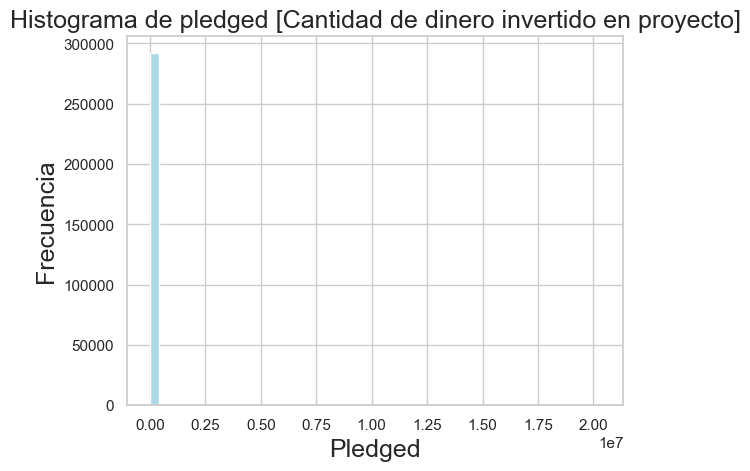

In [305]:
# es importante que el grafico tenga un correcto titulo y valores descriptivos en barras
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
g = projects_2017["pledged"].plot.hist(bins=50, color='lightblue')
g.set_title("Histograma de pledged [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [306]:
# creamos nuevas columnas en escala logaritmica
projects_2017["pledged_log"] = np.log(projects_2017["pledged"]+1)
projects_2017["goal_log"] = np.log(projects_2017["goal"]+1)

### Histograma

Un histograma sirve para mostrar la distribucion de una determinada variable. Para construirlo hacen falta dos parametros: la variable en cuestion que tiene que ser numerica (continua o discreta) y el ancho que van a tener las columnas del histograma. Este valor se fija en matplotlib con el valor de bins, que indica cuanto discretizamos los intervalos.


Text(0,0.5,'Frecuencia')

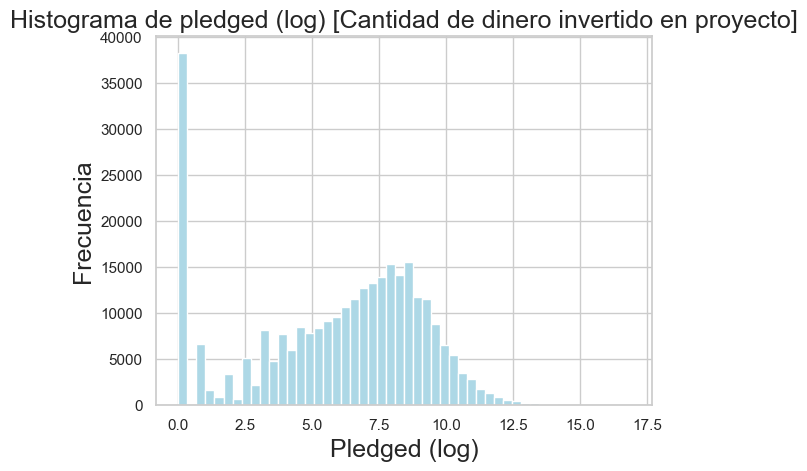

In [312]:
# es importante que el grafico tenga un correcto titulo y valores descriptivos en barras
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
g = projects_2017["pledged_log"].plot.hist(bins=50, color='lightblue')
g.set_title("Histograma de pledged (log) [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0,0.5,'Frecuencia')

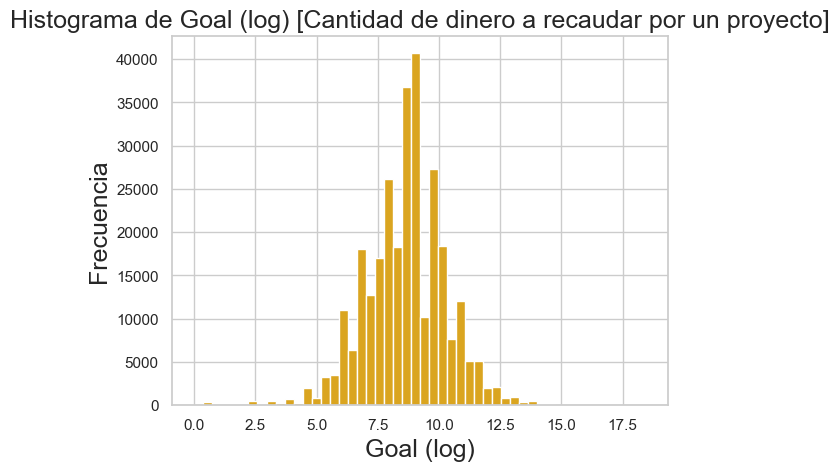

In [307]:
g = projects_2017["goal_log"].plot.hist(bins=50, color='goldenrod')
g.set_title("Histograma de Goal (log) [Cantidad de dinero a recaudar por un proyecto]", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

### Density Plot

Un plot de densidad es una version continua de un histograma (no es necesario indicar el tamaño de los bins). Lo que se muestra es como se distribuye la densidad de la variable numerica a lo largo de todos sus valores posibles.

Text(0,0.5,'Densidad')

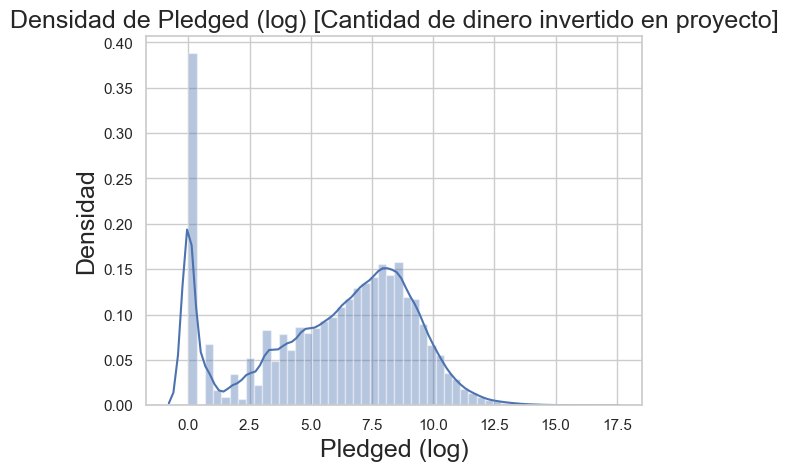

In [313]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
g = sns.distplot(projects_2017["pledged_log"])
g.set_title("Densidad de Pledged (log) [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0,0.5,'Densidad')

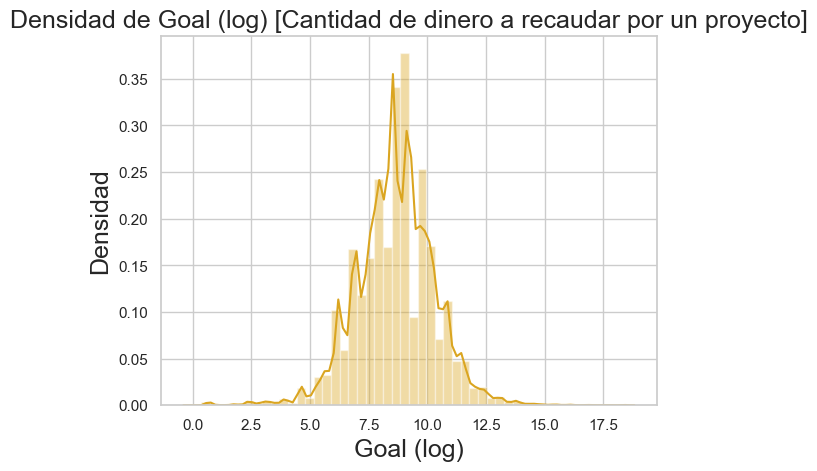

In [314]:
g = sns.distplot(projects_2017["goal_log"], color='goldenrod')
g.set_title("Densidad de Goal (log) [Cantidad de dinero a recaudar por un proyecto]", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

## Overlaid Histogram

Una forma de comparar distribuciones sobre una misma base es realizar un overlay de distintos histogramas.

Text(0,0.5,'Frecuencia')

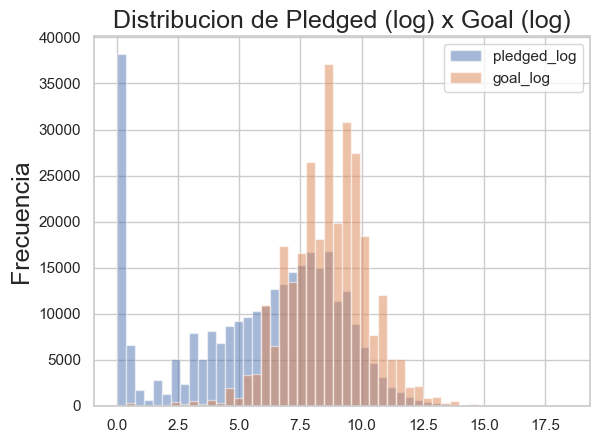

In [315]:
# ambos histogramas juntos
g = projects_2017[["pledged_log","goal_log"]].plot.hist(bins=50,alpha=0.5)
g.set_title("Distribucion de Pledged (log) x Goal (log)", fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

## Overlaid Density Plots

O tambien se pueden analizar directamente comparando sus densidades

Text(0.5,1,'Pledged x Goal cross distribuition')

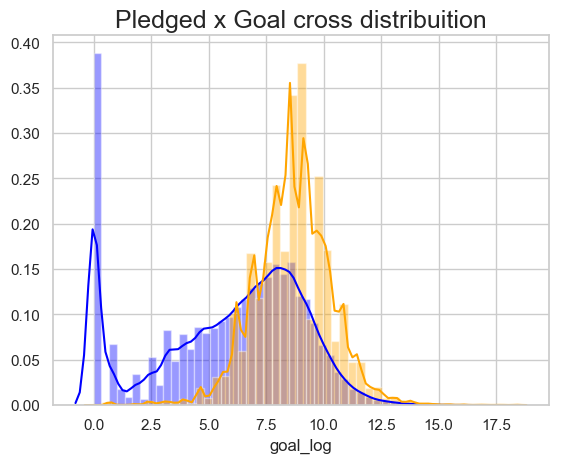

In [316]:
# TODO referencias por color en la visualizacion
g = sns.distplot(projects_2017['pledged_log'], color='blue', label='pledged (log)')
g = sns.distplot(projects_2017['goal_log'], color='orange', label='goal (log)')
g.set_title("Pledged x Goal cross distribuition", fontsize=18)

Por otro lado, podemos analizar las distribuciones de pledged y goal considerando proyectos que hayan side exitosos o hayan fracasado. En las visualizaciones usaremos el rojo para los proyectos que fracasaron y el verde para aquellos que fueron exitosos

In [317]:
failed = projects_2017[projects_2017["state"] == "failed"]
success = projects_2017[projects_2017["state"] == "successful"]

Text(0,0.5,'Densidad')

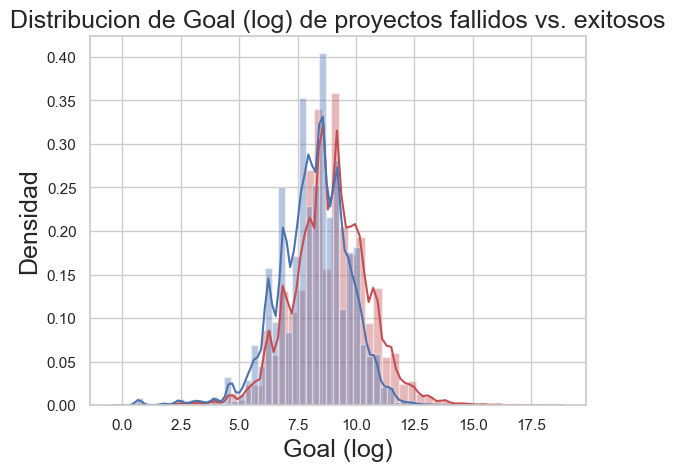

In [318]:
# TODO referencias por color en la visualizacion
g = sns.distplot(failed['goal_log'], color='r')
g = sns.distplot(success['goal_log'], color='b')
g.set_title("Distribucion de Goal (log) de proyectos fallidos vs. exitosos", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0,0.5,'Densidad')

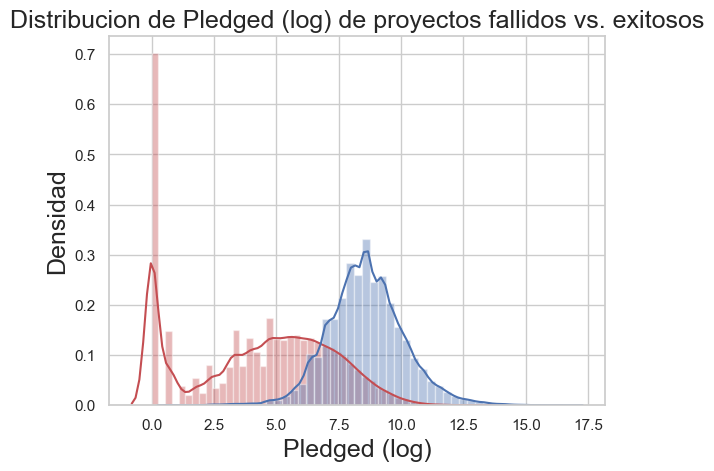

In [319]:
# TODO referencias por color en la visualizacion
g = sns.distplot(failed['pledged_log'], color='r')
g = sns.distplot(success['pledged_log'], color='b')
g.set_title("Distribucion de Pledged (log) de proyectos fallidos vs. exitosos", fontsize=18)
g.set_xlabel("Pledged (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

## Analizando por Estado del proyecto

Otro aspecto que podriamos considerar es analizar los proyecto segun su estado final (variable categorica), para ello podemos sacar inicialmente algunas estadisticas que pueden servirnos para el analisis en relacion a su media y desvio.

In [322]:
print("Calculando la media por estado final del proyecto")
print(round(projects_2017.groupby(["state"])["goal", "pledged"].mean(),2))

Calculando la media por estado final del proyecto
                           goal              pledged
state                                               
canceled              76,293.96             2,317.80
failed                60,664.24             1,331.17
live                  84,039.95             6,352.72
successful             9,695.67            23,212.89
suspended            242,796.61            11,119.73


In [323]:
print("Calculando el desvio standard por estado final del proyecto")
print(round(projects_2017.groupby(["state"])["goal", "pledged"].std(),2))

Calculando el desvio standard por estado final del proyecto
                           goal              pledged
state                                               
canceled           1,295,688.35            12,830.64
failed             1,356,864.41             6,999.57
live               2,377,370.28            35,855.06
successful            28,790.07           160,709.99
suspended          4,239,279.71           120,736.14


## Boxplot

Una forma de ver esta misma informacion es utilizar una visualizacion conocida como boxplot. Usualmente usamos un boxplot para ver la distribucion de una variable numerica de acuerdo a una variable categorica (en este caso los distintos estados posibles de un proyecto).

Text(0,0.5,'Pledged (Log)')

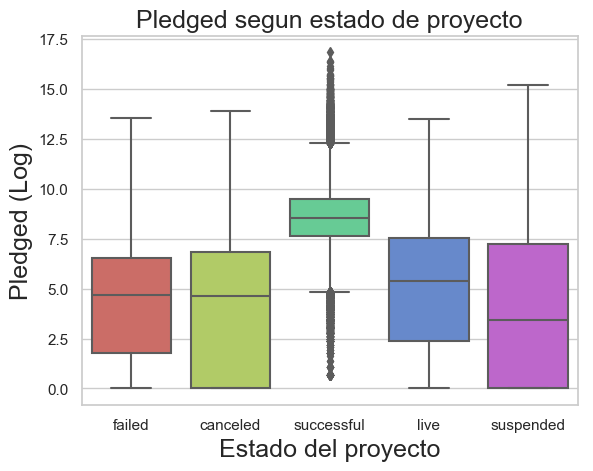

In [326]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
g = sns.boxplot(x="state", y="pledged_log", 
                     data=projects_2017, palette="hls")
g.set_title("Pledged segun estado de proyecto", fontsize=18)
g.set_xlabel("Estado del proyecto", fontsize=18)
g.set_ylabel("Pledged (Log)", fontsize=18)

Para leerlo tenemos que considerar que la 'caja' del boxplot va desde el primer al tercer cuantil, es decir que el 25% de los datos estan por debajo de la caja y el 25% de los datos estan por encima de la caja. La caja concentra entonces el 50% de los datos. Las lıneas que salen de la caja van desde el primer cuantil hasta el valor minimo y maximo y los puntos son valores anomalos (outliers).

## Scatter Plot

Es una de las visualizaciones mas comunes, y versatiles. En un scatter plot representamos dos variables numericas en los ejes X e Y y por cada instancia de nuestro set de datos dibujamos un punto en las coordenadas indicadas.
Estos plots nos dan una idea de la dependencia que existe entre las dos variables y de las caracteristicas de esta dependencia: lineal, no-lineal, etc. Por otro lado podemos sumar mas dimensiones al analisis teniendo en cuenta que podemos darles distintos colores a los distintos puntos del plot.

En nuestro caso podemos querer analizar la relacion entre el pledge (log) y el goal (log) analizando su relacion solamente de los proyectos que fueron exitosos y los que no lo fueron. Tener en cuenta para el analisis que ambos se encuentran en escala logaritmica.

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

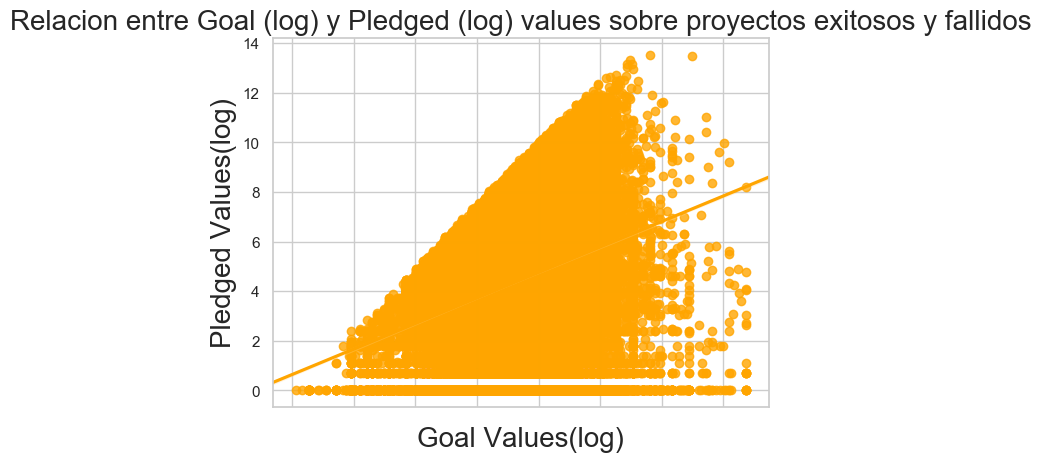

In [328]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# TODO: indicar referencias de colores
#g = sns.regplot(x="goal_log", y="pledged_log", 
#                    data=success, color="lightgreen",)
g = sns.regplot(x="goal_log", y="pledged_log", 
                    data=failed, color="orange")
g.set_title("Relacion entre Goal (log) y Pledged (log) values sobre proyectos exitosos y fallidos", fontsize=20)
g.set_xlabel("Goal Values(log)", fontsize=20)
g.set_ylabel("Pledged Values(log)", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

Text(0,0.5,'Pledged Values(log)')

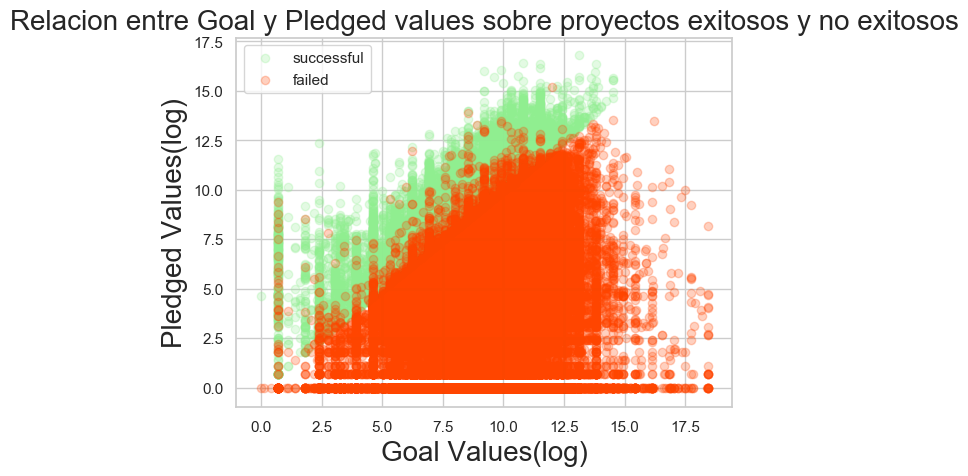

In [329]:
#sacar los live
g = plt.scatter(projects_2017.loc[projects_2017['state'] == 'successful','goal_log'],projects_2017.loc[projects_2017['state'] == 'successful','pledged_log'], alpha='0.25', color='lightgreen', label='successful');
g = plt.scatter(projects_2017.loc[projects_2017['state'] != 'successful','goal_log'],projects_2017.loc[projects_2017['state'] != 'successful','pledged_log'], alpha='0.25', color='orangered', label='failed');
plt.legend();
plt.title("Relacion entre Goal y Pledged values sobre proyectos exitosos y no exitosos", fontsize=20)
plt.xlabel("Goal Values(log)", fontsize=20)
plt.ylabel("Pledged Values(log)", fontsize=20)



# Categoria mas importantes para los proyectos.

Pasando a las variables categoricas podriamos querer analizar cuales son las principales categoria que tienen la mayor cantidad de proyectos.

In [330]:
main_categories_counts = projects_2017["main_category"].value_counts()
main_categories_counts

Film & Video    51922
Music           43238
Publishing      31726
Games           24636
Art             22311
Design          21690
Technology      21556
Food            19941
Fashion         16584
Comics           8910
Theater          8709
Photography      7988
Crafts           6648
Journalism       3540
Dance            3228
Name: main_category, dtype: int64

## Bar Plot

Una forma de poder visualizar este tipo de informacion es utiliza un Bar Plot, de uso bastante popular y donde se cometen muchos errores. Algunas cosas que hay que tener en cuenta es que una de las variables a considerar debe ser categorica y por otro lado, los valores a evaluar deben comenzar en 0.

Existen otras variantes haciendo stacking de valores o directamente indicandolos en barras separadas de forma de que queden agrupados.

Text(0,0.5,'Name of Category')

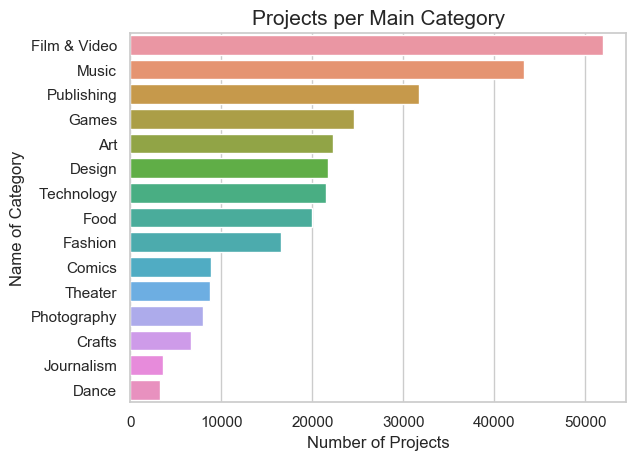

In [331]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x=main_categories_counts.values, y=main_categories_counts.index, orient='h')
g.set_title("Projects per Main Category", fontsize=15)
g.set_xlabel("Number of Projects", fontsize=12)
g.set_ylabel("Name of Category", fontsize=12)

Text(0.5,1,'Projects per Main Category')

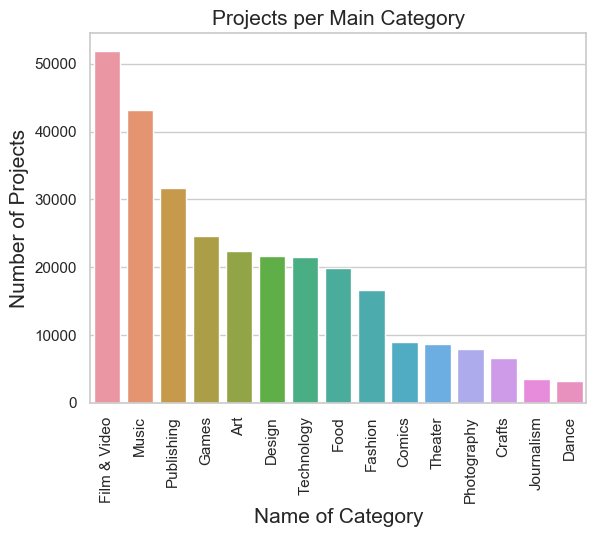

In [332]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
# simplificacion para hacerlo via seaborn con countplot
g = sns.countplot(x='main_category', data=projects_2017, order=projects_2017['main_category'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Name of Category", fontsize=15)
g.set_ylabel("Number of Projects", fontsize=15)
g.set_title("Projects per Main Category", fontsize=15)

## Analisis por Categorias Exitosas y Fallidas

Podemos utilizar este tipo de visualizacion para realizar analisis por categorias exitosas y fallidas.

In [333]:
categories_failed = projects_2017[projects_2017["state"] == "failed"]["category"].value_counts()[:25]
categories_failed

Product Design      7894
Documentary         7185
Food                5829
Music               5177
Fiction             4912
Film & Video        4747
Video Games         4579
Nonfiction          4333
Fashion             4302
Shorts              3975
Apparel             3499
Children's Books    3200
Art                 3164
Technology          2985
Apps                2985
Tabletop Games      2958
Webseries           2956
Photography         2745
Hip-Hop             2618
Publishing          2603
Rock                2413
Narrative Film      2390
Web                 2338
Crafts              2270
Theater             1988
Name: category, dtype: int64

Text(0,0.5,'Nombre de la categoria')

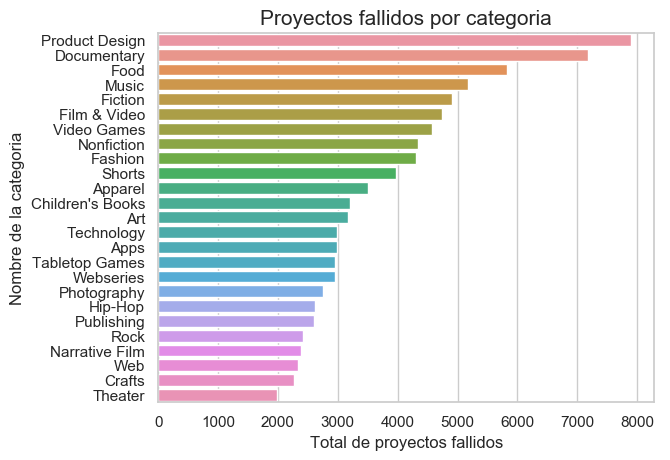

In [334]:
g = sns.barplot(x= categories_failed.values, y=categories_failed.index)
g.set_title("Proyectos fallidos por categoria", fontsize=15)
g.set_xlabel("Total de proyectos fallidos", fontsize=12)
g.set_ylabel("Nombre de la categoria", fontsize=12)

In [335]:
categories_sucessful = projects_2017[projects_2017["state"] == "successful"]["category"].value_counts()[:25]
categories_sucessful

Tabletop Games      5981
Product Design      5838
Music               5749
Shorts              5559
Documentary         5164
Theater             3891
Indie Rock          3441
Rock                3237
Food                2999
Art                 2750
Film & Video        2657
Country & Folk      2595
Comics              2245
Children's Books    1967
Fiction             1925
Narrative Film      1862
Fashion             1849
Nonfiction          1843
Video Games         1671
Photography         1602
Webseries           1528
Dance               1447
Classical Music     1412
Pop                 1395
Public Art          1394
Name: category, dtype: int64

Text(0,0.5,'Nombre de categoria')

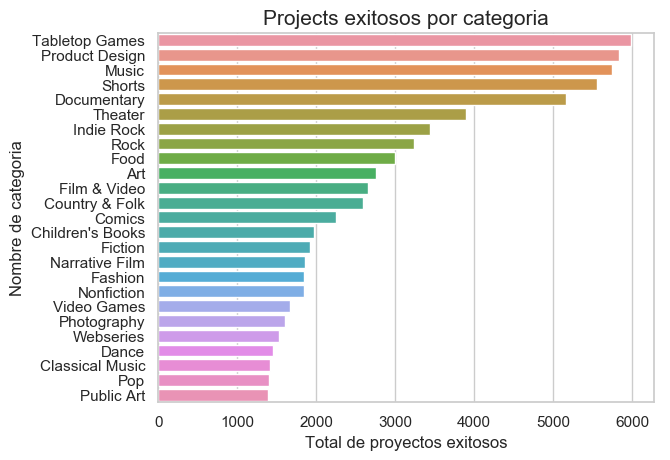

In [336]:
g = sns.barplot(x= categories_sucessful.values, y=categories_sucessful.index)
g.set_title("Projects exitosos por categoria", fontsize=15)
g.set_xlabel("Total de proyectos exitosos", fontsize=12)
g.set_ylabel("Nombre de categoria", fontsize=12)

## Analisis Temporal 

Para poder facilitar el analisis temporal de la informacion agregamos a nuestro data frame algunas columnas a partir del procesamiento de el valor de launched como datetime, y generamos algunas columnas para permitir agrupamientos por año, mes y dia de la semana.

In [337]:
# procesamiento de fechas de lanzamiento en mes y año
projects_2017['launched'] = pd.to_datetime(projects_2017['launched'])
projects_2017['launch_month'] = projects_2017['launched'].dt.month
projects_2017['launch_year'] = projects_2017['launched'].dt.year
projects_2017['launch_weekday_name'] = projects_2017['launched'].dt.weekday_name

Para poder entender algunos aspectos de los datos, utilizamos [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) para obtener una cross tabulacion de dos factores. Por default utiliza la frecuencia.

In [338]:
#cantidades por estado y año
pd.crosstab(projects_2017.launch_year, projects_2017.state)

state,canceled,failed,live,successful,suspended
launch_year,,,,,
1970,6,0,0,0,0
2009,150,600,0,579,0
2010,926,4984,0,4593,16
2011,2144,11878,0,12171,44
2012,2572,20217,0,17706,52
2013,3025,18407,0,17201,54
2014,5288,28498,0,16811,172
2015,6165,31459,0,15451,468
2016,4608,20406,1,12803,212


## Grouped Bar Plot

Para visualizar esta informacion podemos crear un Grouped Bar Plot agrupando por el estado del proyecto


Text(0,0.5,'Cantidad de Proyectos')

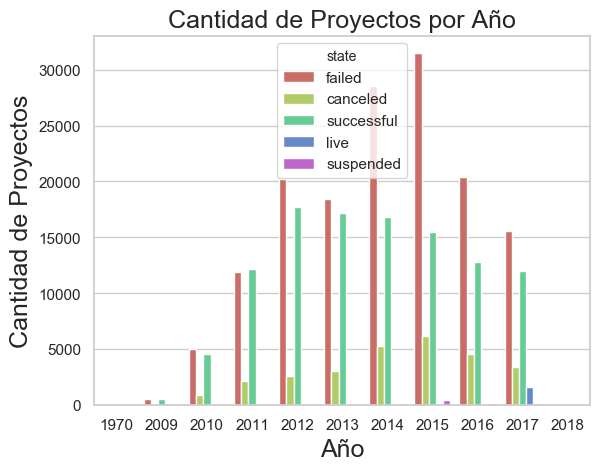

In [339]:
g = sns.countplot(x="launch_year", hue="state", data=projects_2017, palette="hls")
g.set_title("Cantidad de Proyectos por Año", fontsize=18)
g.set_xlabel("Año", fontsize=18)
g.set_ylabel("Cantidad de Proyectos", fontsize=18)

# Nota: Stacked Bar Plot
# al creador de seaborn no le gustan los stacked http://randyzwitch.com/creating-stacked-bar-chart-seaborn/
# Investigar como realizarlo en https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

Tambien podemos con la informacion temporal que tenemos analizar la distribucion de algunas de las variables continuas que consideramos temporalmente, por ejemplo la cantidad de dinero invertido en proyectos por los usuarios (pledged) por año.

Text(0,0.5,'Pledged (log)')

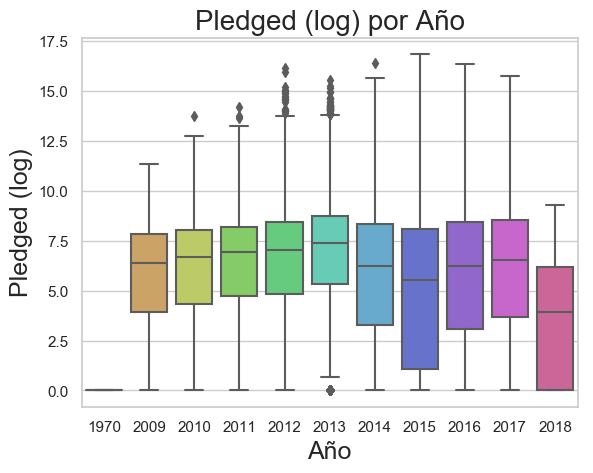

In [342]:
g = sns.boxplot(x="launch_year", y="pledged_log", 
                     data=projects_2017, palette="hls")
g.set_title("Pledged (log) por Año", fontsize=20)
g.set_xlabel("Año", fontsize=18)
g.set_ylabel("Pledged (log)", fontsize=18)

## Analizando Backers de Proyectos

Como analizamos al principio, dado la dispersion de valores que tenemos haremos el analisis de la backers en escala logaritmica.

In [343]:
# creamos una nueva columna en el data frame llevando backers a escala logaritmica.
projects_2017["backers_log"] = np.log(projects_2017["backers"]+1)

Text(0,0.5,'Frecuencia')

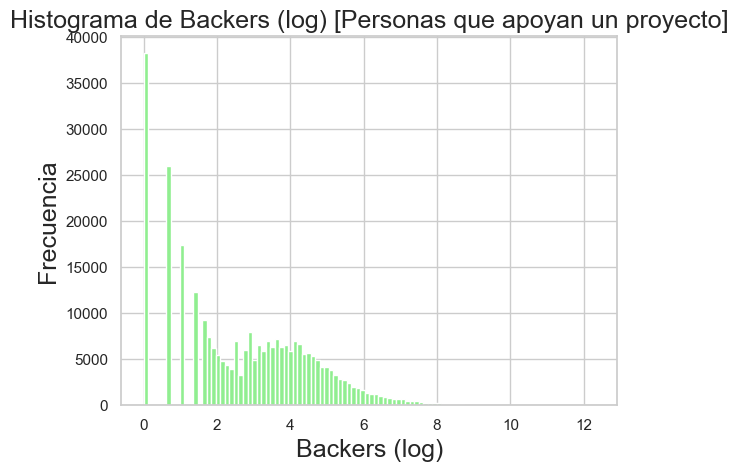

In [344]:
g = projects_2017["backers_log"].plot.hist(bins=100, color="lightgreen") #notese el verde kickstarter xD
g.set_title("Histograma de Backers (log) [Personas que apoyan un proyecto]", fontsize=18)
g.set_xlabel("Backers (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0,0.5,'Densidad')

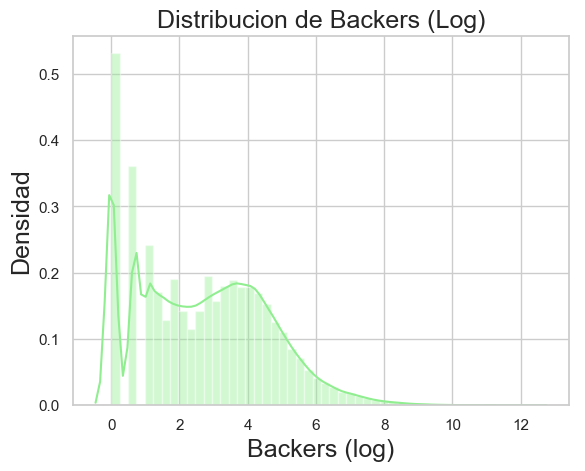

In [345]:
g = sns.distplot(projects_2017["backers_log"], color='lightgreen')
g.set_title("Distribucion de Backers (Log)", fontsize=18)
g.set_xlabel("Backers (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Por otro lado podemos realizar un analisis creando un scatter plot para los posibles estados de los proyectos usando lmplot.

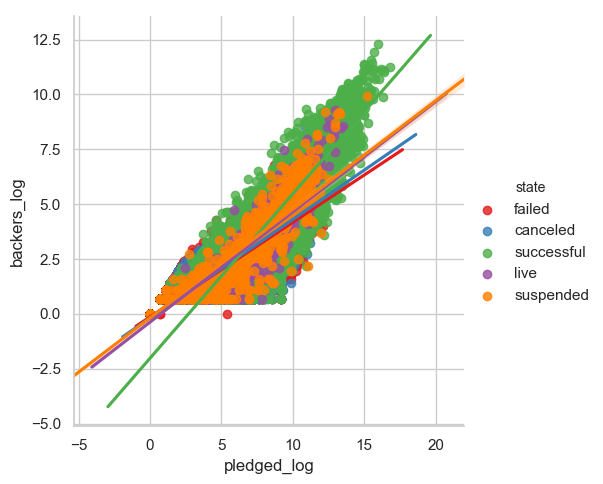

In [346]:
# "Relacion entre Pledged (log) y Backers (log) values sobre proyectos en todos los estados"
g = sns.lmplot(x="pledged_log", y="backers_log", 
                    data=projects_2017, hue='state', palette='Set1')
# ver el tema de alpha

## Heatmap

Supongamos que tenemos un set de datos de la forma (name,variable,value) por ejemplo ("Año Lanzamiento de Proyecto", "Mes de Lanzamiento de Proyecto", "Goal del Proyecto") indicando que en el año 2017, en el mes de Marzo hubo un promedio de 76000 dolares por proyecto. 

Un heatmap representa en el eje Y todos los puntos, instancias (años) y en el eje X cada una de las categorias posibles (meses en este caso). Los ejes suelen ser intercambiables sin que afecte la visualizacin. 

El heatmap es entonces una matriz en donde cada celda muestra el valor que toma la variable del eje X para el punto del eje Y, tomando con valores de un cierto color cuando son mas altos y de otro cuando son mas bajos.

## Analizando Goal por Año y Mes

In [347]:
# llevamos a una representacion de ese tipo usando una tabla pivot (se vera en detalle en la proxima clase).
# tener en cuenta que no puede haber valores duplicados por el indice por lo cual es necesario usar algun tipo
# funcion de agregacion
for_heatmap = projects_2017[projects_2017['state'] == 'successful'].pivot_table(index='launch_year', columns='launch_month', values='goal', aggfunc='mean')

In [348]:
for_heatmap

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launch_year,,,,,,,,,,,,
2009,nan,nan,nan,"2,074.45","1,847.47","2,557.92","3,240.94","4,033.57","4,265.79","3,457.29","3,582.78","4,022.15"
2010,"4,552.00","4,140.34","4,432.71","3,785.46","4,322.57","4,119.88","4,157.09","4,062.14","4,583.23","4,784.33","4,631.09","4,680.83"
2011,"4,332.52","4,773.10","4,749.70","5,035.03","5,338.26","5,548.37","5,083.20","4,930.93","5,651.80","5,481.88","6,333.65","5,837.98"
2012,"5,339.18","6,452.11","6,807.35","8,278.39","8,449.81","8,221.95","9,525.18","9,225.34","10,157.09","9,071.89","9,886.93","8,437.67"
2013,"9,247.06","9,100.23","11,537.99","13,141.98","11,834.06","10,703.79","11,626.44","9,611.95","12,344.80","12,600.22","10,936.47","10,674.37"
2014,"9,642.69","9,704.84","11,254.21","12,252.04","12,115.17","11,517.90","8,018.30","9,619.76","10,381.71","11,114.10","11,745.76","8,638.58"
2015,"11,210.08","12,448.05","10,229.98","10,740.50","12,383.39","13,812.12","12,435.24","11,320.63","12,790.27","13,287.19","13,812.54","8,097.25"
2016,"9,814.16","11,258.02","12,310.83","11,144.97","13,879.03","12,807.20","10,718.23","10,117.74","11,385.75","12,215.44","11,229.77","8,575.05"
2017,"7,956.56","11,381.47","9,389.22","10,751.59","12,066.70","11,196.82","11,001.64","10,224.00","11,512.53","11,114.63","9,100.36","4,463.64"


Text(47.25,0.5,'Año de Lanzamiento del Proyecto')

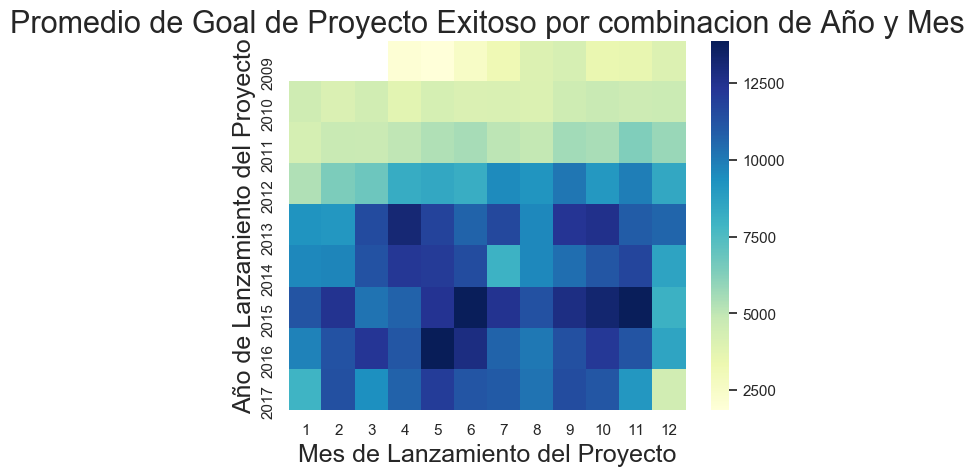

In [349]:
# https://en.wikipedia.org/wiki/Kickstarter
# notar que segun la empresa de lanzo en 2009 en abril
# Launched April 28, 2009; 8 years ago
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Promedio de Goal de Proyecto Exitoso por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

Text(47.25,0.5,'Año de Lanzamiento del Proyecto')

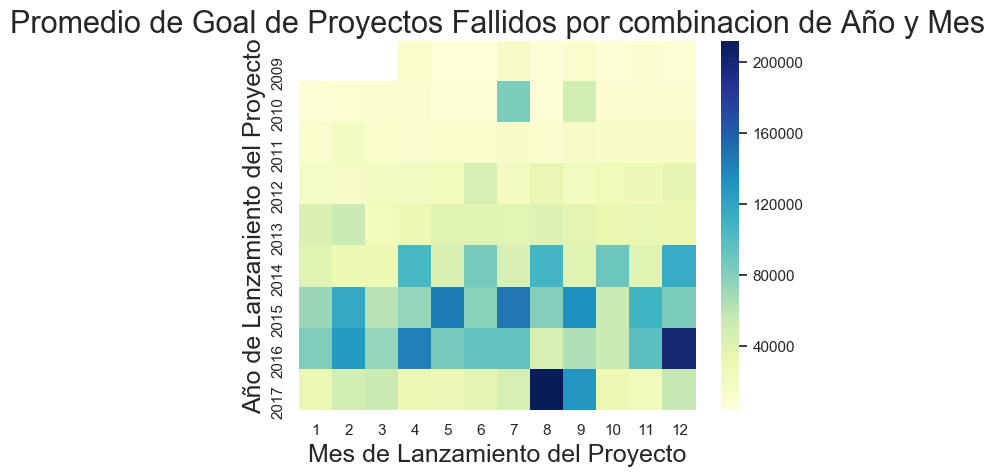

In [350]:
# llevamos a una representacion de ese tipo usando una tabla pivot (se vera en detalle en la proxima clase).
# tener en cuenta que no puede haber valores duplicados por el indice por lo cual es necesario usar algun tipo
# funcion de agregacion
for_heatmap = projects_2017[projects_2017['state'] == 'failed'].pivot_table(index='launch_year', columns='launch_month', values='goal', aggfunc='mean')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Promedio de Goal de Proyectos Fallidos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

## Analizando Lanzamientos de proyectos por año y mes

In [351]:
# generamos una columna para agregar y procesar mediante una tabla pivot
projects_2017['active_project'] = 1
for_heatmap = projects_2017.pivot_table(index='launch_year', columns='launch_month', values='active_project', aggfunc='sum')

In [352]:
for_heatmap

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launch_year,,,,,,,,,,,,
1970,6.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009,nan,nan,nan,19.00,74.00,75.00,78.00,115.00,348.00,194.00,218.00,208.00
2010,296.00,371.00,511.00,678.00,760.00,"1,093.00","1,067.00",967.00,"1,028.00","1,210.00","1,272.00","1,266.00"
2011,"1,594.00","1,803.00","2,025.00","2,243.00","2,288.00","2,294.00","2,368.00","2,320.00","2,151.00","2,311.00","2,612.00","2,228.00"
2012,"2,903.00","3,358.00","4,048.00","3,773.00","3,962.00","3,927.00","3,664.00","3,521.00","3,042.00","3,397.00","2,859.00","2,093.00"
2013,"2,919.00","2,980.00","3,404.00","3,549.00","3,748.00","3,398.00","3,458.00","3,108.00","3,057.00","3,454.00","3,280.00","2,332.00"
2014,"2,759.00","2,940.00","3,421.00","3,485.00","3,517.00","3,861.00","8,198.00","5,659.00","4,865.00","4,934.00","4,174.00","2,956.00"
2015,"4,955.00","5,603.00","5,988.00","5,489.00","4,810.00","4,588.00","4,033.00","3,871.00","3,936.00","3,839.00","3,817.00","2,614.00"
2016,"3,332.00","3,515.00","3,828.00","3,455.00","3,460.00","3,332.00","2,994.00","3,100.00","2,897.00","3,176.00","2,935.00","2,006.00"


Text(47.25,0.5,'Año de Lanzamiento del Proyecto')

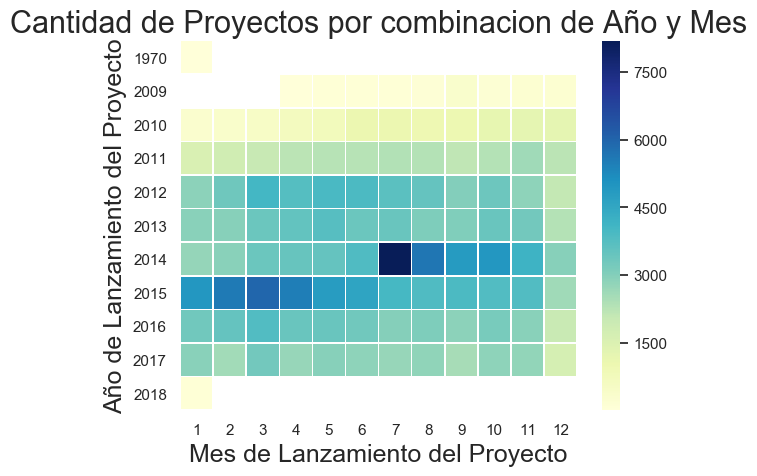

In [353]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

## Analizando Lanzamientos de proyectos por año y dia de la semana

In [356]:
for_heatmap = projects_2017.pivot_table(index='launch_year', columns='launch_weekday_name', values='active_project', aggfunc='sum')

In [357]:
for_heatmap

launch_weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
launch_year,,,,,,,
1970,nan,nan,nan,nan,6.00,nan,nan
2009,190.00,227.00,109.00,122.00,203.00,257.00,221.00
2010,"1,641.00","1,484.00","1,059.00",826.00,"1,744.00","1,936.00","1,829.00"
2011,"4,103.00","3,788.00","2,927.00","2,029.00","4,400.00","4,536.00","4,454.00"
2012,"6,742.00","5,566.00","3,557.00","1,708.00","7,448.00","8,288.00","7,238.00"
2013,"6,640.00","5,732.00","3,350.00","1,343.00","6,307.00","8,187.00","7,128.00"
2014,"8,213.00","7,911.00","4,293.00","2,288.00","7,996.00","10,442.00","9,626.00"
2015,"7,987.00","9,746.00","4,477.00","3,046.00","8,349.00","10,626.00","9,312.00"
2016,"5,674.00","6,674.00","3,123.00","2,195.00","5,791.00","8,085.00","6,488.00"


Text(47.25,0.5,'Año de Lanzamiento del Proyecto')

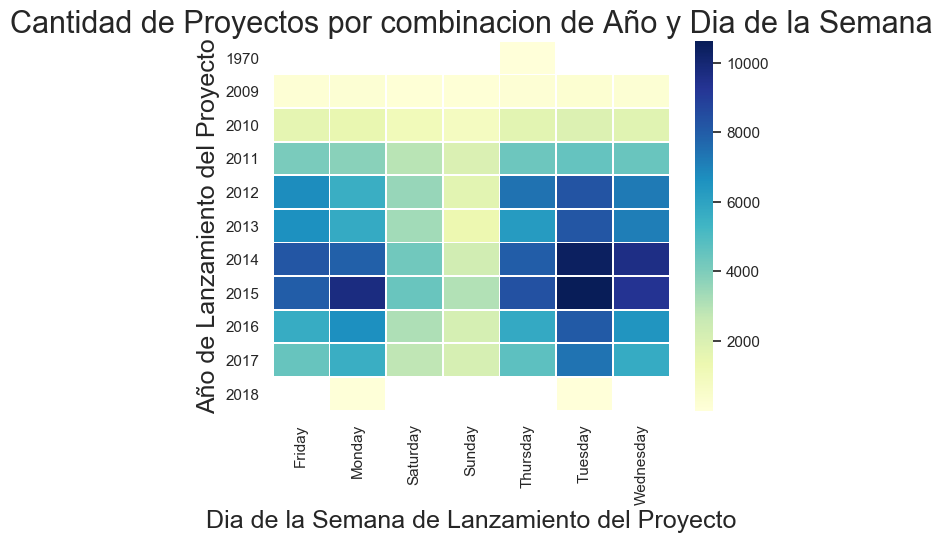

In [358]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu")
# ver ordenamiento
g.set_title("Cantidad de Proyectos por combinacion de Año y Dia de la Semana", fontsize=22)
g.set_xlabel("Dia de la Semana de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)